In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/hp/Downloads/archive (1)/heart_2020_cleaned.csv')

In [3]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## Checking Duplicate and Missing data

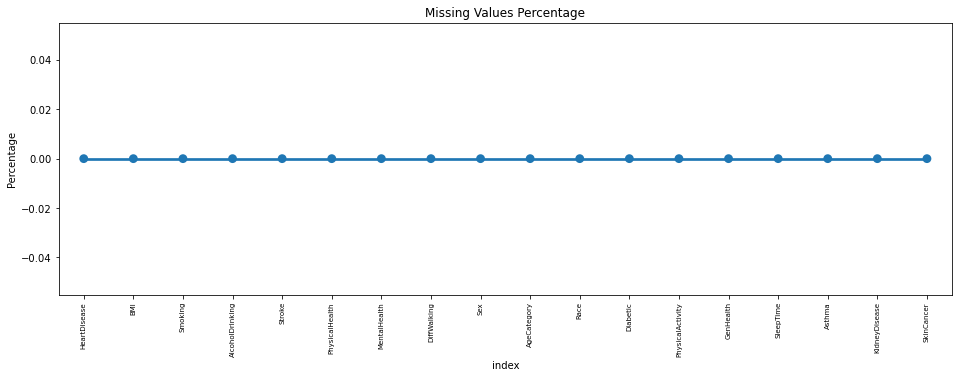

In [7]:
#Percentage of missing values
plt.figure(figsize = (16,5))
missing_values = pd.DataFrame(data.isnull().sum()*100/data.shape[0]).reset_index()
ax = sns.pointplot('index',0,data=missing_values)
plt.xticks(rotation =90,fontsize =7)
plt.title('Missing Values Percentage')
plt.ylabel("Percentage")

plt.show()

In [8]:
#Checking rows and columns
data.shape

(319795, 18)

Overall, the data has 300,000+ rows and 18 columns.

In [8]:
#Checking duplicate values
len(data[data.duplicated()])

18078

There is no missing value in the overall data, but there is 18000+ duplicate values are present. Now we're going to drop the duplicate data

In [10]:
data1 = data.drop_duplicates()

In [11]:
data1.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [12]:
len(data1)

301717

## Data Visualisation

### Correlation Analysis

In [29]:
dummy = pd.DataFrame({'data1' : ['HeartDisease', 'Smoking', 'Stroke', 'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma', 'KidentDisease', 'SkinCancer', 'HeartDisease', 'BMI'],})
dummy

,data1
0,HeartDisease
1,Smoking
2,Stroke
3,Diabetic
4,PhysicalActivity
5,SleepTime
6,Asthma
7,KidentDisease
8,SkinCancer
9,HeartDisease


In [30]:
dummy_1 = pd.get_dummies(dummy)
dummy_1

,data1_Asthma,data1_BMI,data1_Diabetic,data1_HeartDisease,data1_KidentDisease,data1_PhysicalActivity,data1_SkinCancer,data1_SleepTime,data1_Smoking,data1_Stroke
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0
9,0,0,0,1,0,0,0,0,0,0


In [55]:
corr1 = dummy_1.corr()
corr1

,data1_Asthma,data1_BMI,data1_Diabetic,data1_HeartDisease,data1_KidentDisease,data1_PhysicalActivity,data1_SkinCancer,data1_SleepTime,data1_Smoking,data1_Stroke
data1_Asthma,1.000000,-0.100000,-0.100000,-0.149071,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
data1_BMI,-0.100000,1.000000,-0.100000,-0.149071,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
data1_Diabetic,-0.100000,-0.100000,1.000000,-0.149071,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
data1_HeartDisease,-0.149071,-0.149071,-0.149071,1.000000,-0.149071,-0.149071,-0.149071,-0.149071,-0.149071,-0.149071
data1_KidentDisease,-0.100000,-0.100000,-0.100000,-0.149071,1.000000,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000
data1_PhysicalActivity,-0.100000,-0.100000,-0.100000,-0.149071,-0.100000,1.000000,-0.100000,-0.100000,-0.100000,-0.100000
data1_SkinCancer,-0.100000,-0.100000,-0.100000,-0.149071,-0.100000,-0.100000,1.000000,-0.100000,-0.100000,-0.100000
data1_SleepTime,-0.100000,-0.100000,-0.100000,-0.149071,-0.100000,-0.100000,-0.100000,1.000000,-0.100000,-0.100000
data1_Smoking,-0.100000,-0.100000,-0.100000,-0.149071,-0.100000,-0.100000,-0.100000,-0.100000,1.000000,-0.100000
data1_Stroke,-0.100000,-0.100000,-0.100000,-0.149071,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,1.000000


In [52]:
corr = data.corr()
corr

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


<AxesSubplot:>

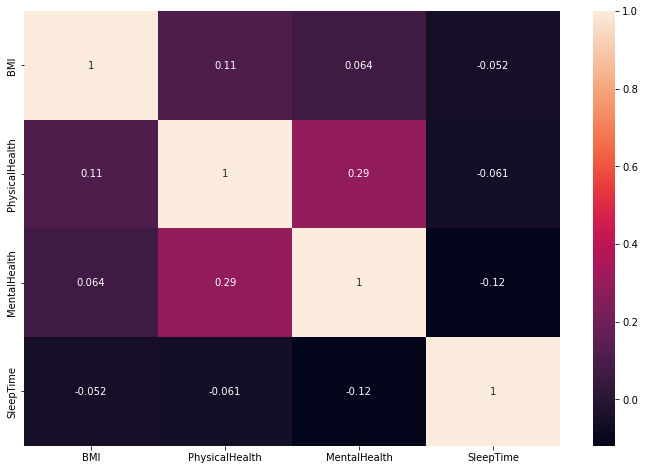

In [53]:
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True)

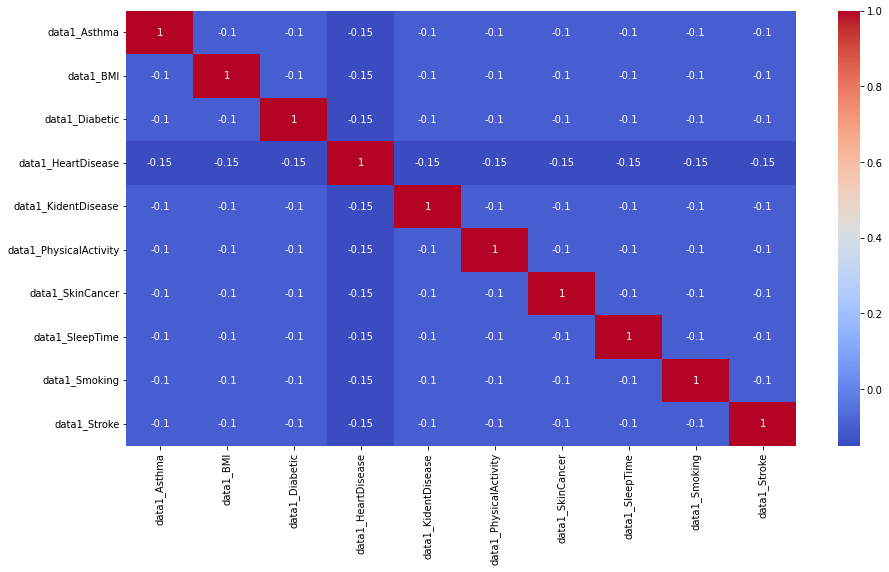

In [61]:
plt.figure(figsize = (15,8))
sns.heatmap(corr1, annot = True, cmap = 'coolwarm')
plt.show()

A correlation of 1 indicates a perfect positive correlation; a correlation of -1 indicates a perfect negative correlation; and a correlation of 0 indicates no correlation.

From the above analysis, we can see that heart disease has a negative correlation with BMI, diabetes, kidney disease, stroke, and all other variables.

In [36]:
data1['HeartDisease'].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

In [47]:
HD = 100*data1['HeartDisease'].value_counts()/len(data1)
HD = HD.round(2)
HD

No     90.96
Yes     9.04
Name: HeartDisease, dtype: float64

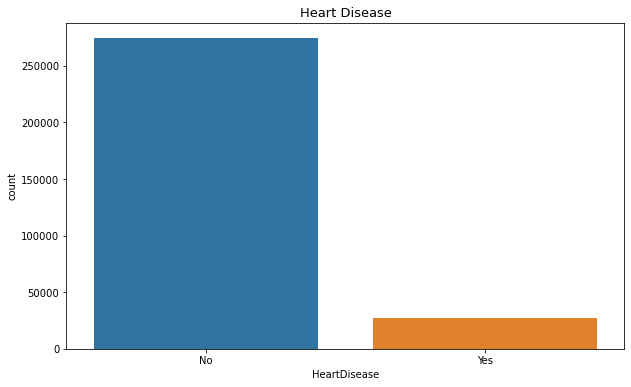

In [42]:
plt.figure(figsize = (10,6))
sns.countplot(data1['HeartDisease'])
plt.title('Heart Disease', fontsize = (13))
plt.show()

90% of the population does not have heart disease, while only 9% of the population has heart disease.

## Health Status Analysis

In [12]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [13]:
data1.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [49]:
d1 = data[['AgeCategory','PhysicalHealth', 'MentalHealth', 'GenHealth']]
d1.head(10)

,AgeCategory,PhysicalHealth,MentalHealth,GenHealth
0,55-59,3.0,30.0,Very good
1,80 or older,0.0,0.0,Very good
2,65-69,20.0,30.0,Fair
3,75-79,0.0,0.0,Good
4,40-44,28.0,0.0,Very good
5,75-79,6.0,0.0,Fair
6,70-74,15.0,0.0,Fair
7,80 or older,5.0,0.0,Good
8,80 or older,0.0,0.0,Fair
9,65-69,0.0,0.0,Good


In [17]:
health = data.groupby(['AgeCategory'])['PhysicalHealth', 'MentalHealth'].sum().reset_index()
health

,AgeCategory,PhysicalHealth,MentalHealth
0,18-24,35787.0,129597.0
1,25-29,30557.0,97137.0
2,30-34,37850.0,99251.0
3,35-39,46065.0,103773.0
4,40-44,54087.0,98207.0
5,45-49,65827.0,95569.0
6,50-54,91568.0,109695.0
7,55-59,119844.0,120693.0
8,60-64,145447.0,119604.0
9,65-69,131645.0,98614.0


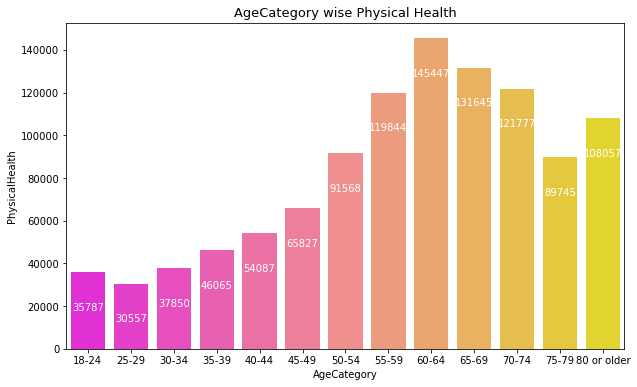

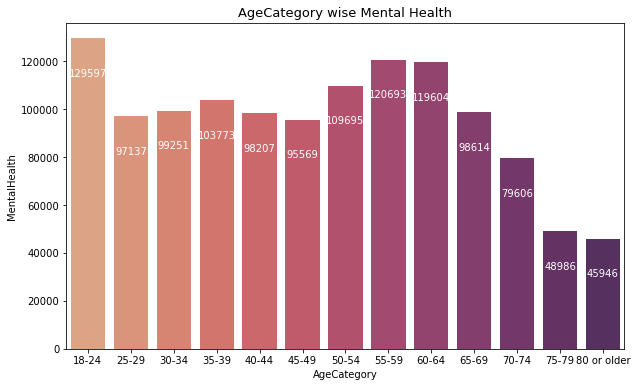

In [22]:
#plotting physical health graph with age category 
plt.figure(figsize = (10,6))
p = sns.barplot(data = health, x = 'AgeCategory', y = 'PhysicalHealth', palette = 'spring')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=10)
plt.title('AgeCategory wise Physical Health', fontsize = (13))               
plt.show()

#plotting mental health graph with age category 
plt.figure(figsize = (10,6))
p = sns.barplot(data = health, x = 'AgeCategory', y = 'MentalHealth', palette = 'flare')
for container in p.containers:
    p.bar_label(container,padding=-40, color = 'White', fontsize=10)
plt.title('AgeCategory wise Mental Health', fontsize = (13)) 
plt.show()

The above analyses show that physical health tends to increase until the age of 65–69 and then decrease, while mental health tends to remain relatively stable until the age of 65–69 and then decrease.

In [113]:
age = data[['AgeCategory', 'GenHealth']]['AgeCategory'].count()
age

319795

In [47]:
age1 = data.groupby(['AgeCategory'])['GenHealth'].count().reset_index()
age1

,AgeCategory,GenHealth
0,18-24,21064
1,25-29,16955
2,30-34,18753
3,35-39,20550
4,40-44,21006
5,45-49,21791
6,50-54,25382
7,55-59,29757
8,60-64,33686
9,65-69,34151


<Figure size 1080x576 with 0 Axes>

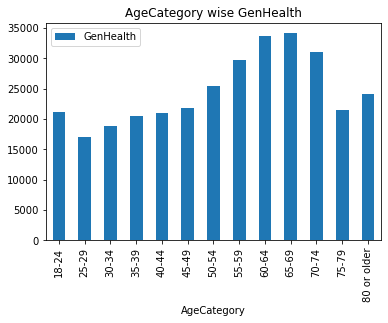

In [72]:
plt.figure(figsize = (15,8))
age1.plot(kind='bar', x= 'AgeCategory', y = 'GenHealth')
plt.title('AgeCategory wise GenHealth')
plt.show()

## Demographics Analysis

In [75]:
data1.groupby(['AgeCategory'])['Sex'].count()

AgeCategory
18-24          19998
25-29          16312
30-34          17953
35-39          19526
40-44          19837
45-49          20518
50-54          23736
55-59          27610
60-64          31219
65-69          31670
70-74          29273
75-79          20713
80 or older    23352
Name: Sex, dtype: int64

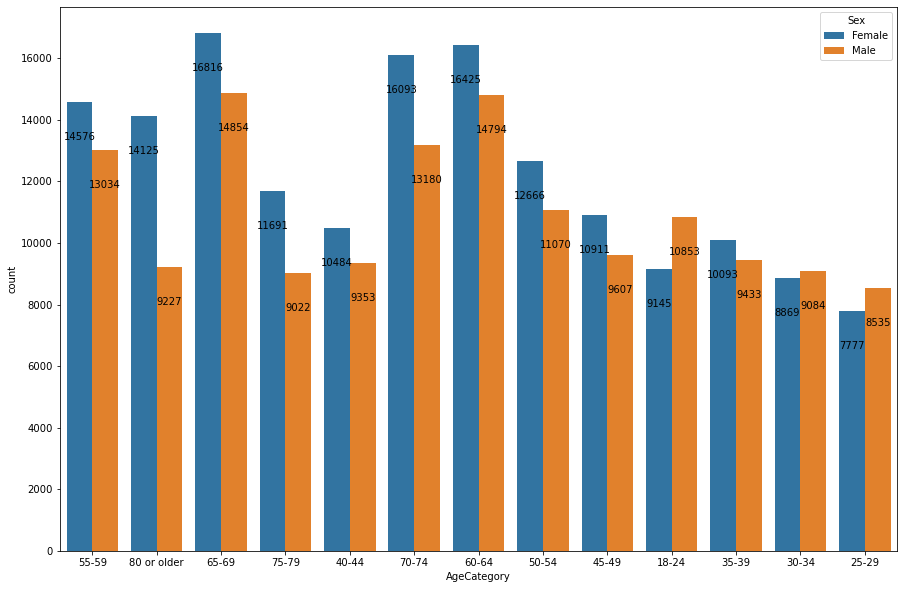

In [85]:
plt.figure(figsize =(15,10))
p = sns.countplot(data1['AgeCategory'], hue=data1['Sex'])
for container in p.containers:
    p.bar_label(container,padding=-40, color = 'black',fontsize=10) 
plt.show()

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

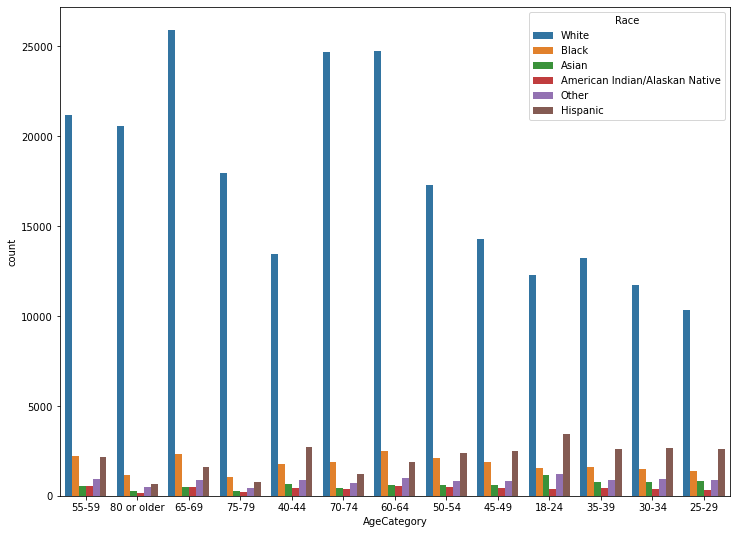

In [68]:
plt.figure(figsize =(12,9))
sns.countplot(data1['AgeCategory'], hue=data1['Race'])

## Sleep Analysis

In [91]:
data1[['SleepTime', 'AgeCategory']]

,SleepTime,AgeCategory
0,5.0,55-59
1,7.0,80 or older
2,8.0,65-69
3,6.0,75-79
4,8.0,40-44
...,...,...
319790,6.0,60-64
319791,5.0,35-39
319792,6.0,45-49
319793,12.0,25-29


In [92]:
data1['SleepTime'].mean()

7.084559371861712

In [96]:
# percentage of the population gets less than the recommended 7-8 hours of sleep per night
less_than_7_or_more_than_8 = data1[(data1['SleepTime'] < 7) | (data1['SleepTime'] > 8)]
percentage = len(less_than_7_or_more_than_8) / len(data1) * 100
percentage 

40.458442845447884

In [101]:
sleep = data1[['SleepTime', 'PhysicalActivity', 'AlcoholDrinking']]

In [104]:
data1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [105]:
dummy = pd.DataFrame({'data1' : ['PhysicalActivity', 'SleepTime','AlcoholDrinking'],})
dummy

,data1
0,PhysicalActivity
1,SleepTime
2,AlcoholDrinking


In [106]:
dummy_2 = pd.get_dummies(dummy)
dummy_2

,data1_AlcoholDrinking,data1_PhysicalActivity,data1_SleepTime
0,0,1,0
1,0,0,1
2,1,0,0


In [107]:
corr = dummy_2.corr()
corr

,data1_AlcoholDrinking,data1_PhysicalActivity,data1_SleepTime
data1_AlcoholDrinking,1.0,-0.5,-0.5
data1_PhysicalActivity,-0.5,1.0,-0.5
data1_SleepTime,-0.5,-0.5,1.0


<AxesSubplot:>

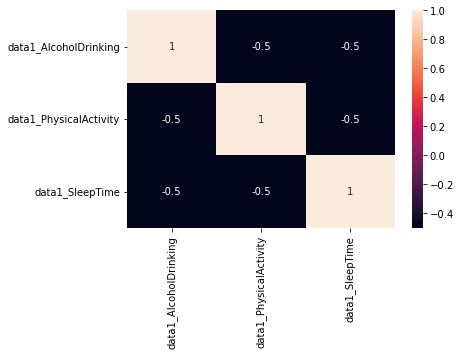

In [108]:
sns.heatmap(corr, annot = True)

The correlation table suggests that there is a negative correlation between alcohol drinking, physical activity, and sleep time. This means that as alcohol consumption or physical activity increases, the duration of sleep decreases. Similarly, as the duration of sleep increases, the level of alcohol consumption or physical activity decreases